### V6 **[BEST ONE SO FAR]**

In [1]:
!git clone https://github.com/shafidaaaa/Bangkit.git

fatal: destination path 'Bangkit' already exists and is not an empty directory.


In [2]:
# Define the path to the images directory
image_directory1 = '/content/Bangkit/Capstone/bisindo_data/Citra BISINDO'
image_directory2 = '/content/Bangkit/Capstone/bisindo_data/bisindo_dataset_v2'
image_directory3 = '/content/Bangkit/Capstone/bisindo_data/bisindo_dataset_v3'

VGG16 SOLVED ISSUES

In [30]:
!pip uninstall -y tensorflow tensorflowjs tensorflow_decision_forests


Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
Found existing installation: tensorflowjs 4.20.0
Uninstalling tensorflowjs-4.20.0:
  Successfully uninstalled tensorflowjs-4.20.0
Found existing installation: tensorflow_decision_forests 1.9.1
Uninstalling tensorflow_decision_forests-1.9.1:
  Successfully uninstalled tensorflow_decision_forests-1.9.1


In [3]:
!pip install tensorflow==2.16.1 tensorflowjs

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


BATCH_SIZE = 4
IMAGE_SIZE = (224, 224)

# Load images and labels
def load_images_and_labels(image_directory, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE):
    images = []
    labels = []
    for label in os.listdir(image_directory):
        label_path = os.path.join(image_directory, label)
        if os.path.isdir(label_path):
            image_paths = [os.path.join(label_path, image_name) for image_name in os.listdir(label_path)]
            for batch_start in range(0, len(image_paths), batch_size):
                batch_end = min(batch_start + batch_size, len(image_paths))
                batch_image_paths = image_paths[batch_start:batch_end]
                batch_images = []
                for image_path in batch_image_paths:
                    image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
                    image = tf.keras.preprocessing.image.img_to_array(image)
                    image = image / 255.0  # Normalize the image
                    batch_images.append(image)
                images.extend(batch_images)
                labels.extend([label] * len(batch_images))
    return np.array(images), np.array(labels)

# Load images and labels
X1, y1 = load_images_and_labels(image_directory1)
X2, y2 = load_images_and_labels(image_directory2)
X3, y3 = load_images_and_labels(image_directory3)

# Combine the data
X = np.concatenate((X1, X2, X3), axis=0)
y = np.concatenate((y1, y2, y3), axis=0)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Load VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model that includes both the VGG16 base model and the classifier
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.3214 - loss: 3.9289 - val_accuracy: 0.8692 - val_loss: 0.4722
Epoch 2/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9417 - loss: 0.2600 - val_accuracy: 0.9252 - val_loss: 0.2630
Epoch 3/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9820 - loss: 0.0990 - val_accuracy: 0.9439 - val_loss: 0.1917
Epoch 4/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9781 - loss: 0.0761 - val_accuracy: 0.9720 - val_loss: 0.1102
Epoch 5/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9973 - loss: 0.0155 - val_accuracy: 0.9688 - val_loss: 0.0977
Epoch 6/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.9782 - val_loss: 0.0907
Epoch 7/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9720 - val_loss: 0.0941
Epoch 8/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 1.0000 - loss: 0.0022 - 

In [13]:
# Save model
model.save('modelVGG.h5')

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Predicted classes
predicted_classes = np.argmax(predictions, axis=1)
predicted_class = label_encoder.inverse_transform(predicted_classes)

# True classes
true_classes = np.argmax(y_test, axis=1)
true_class = label_encoder.inverse_transform(true_classes)


print("Predicted classes:", predicted_class[:10])
print("True classes     :", true_class[:10])

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9694 - loss: 0.1138
Test accuracy: 0.9751
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
Predicted classes: ['V' 'R' 'V' 'Z' 'U' 'G' 'B' 'S' 'Z' 'O']
True classes     : ['V' 'R' 'V' 'Z' 'U' 'G' 'B' 'S' 'Z' 'O']


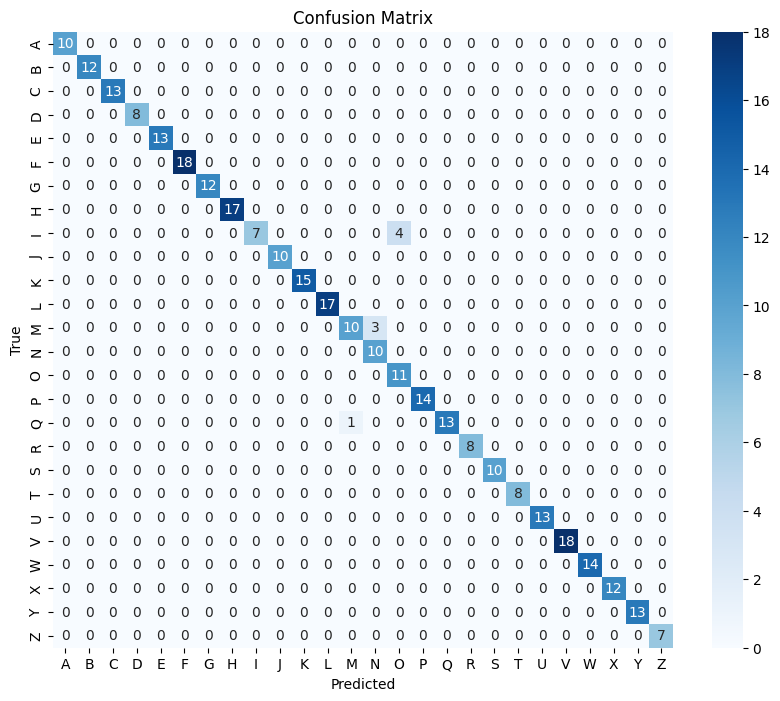

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


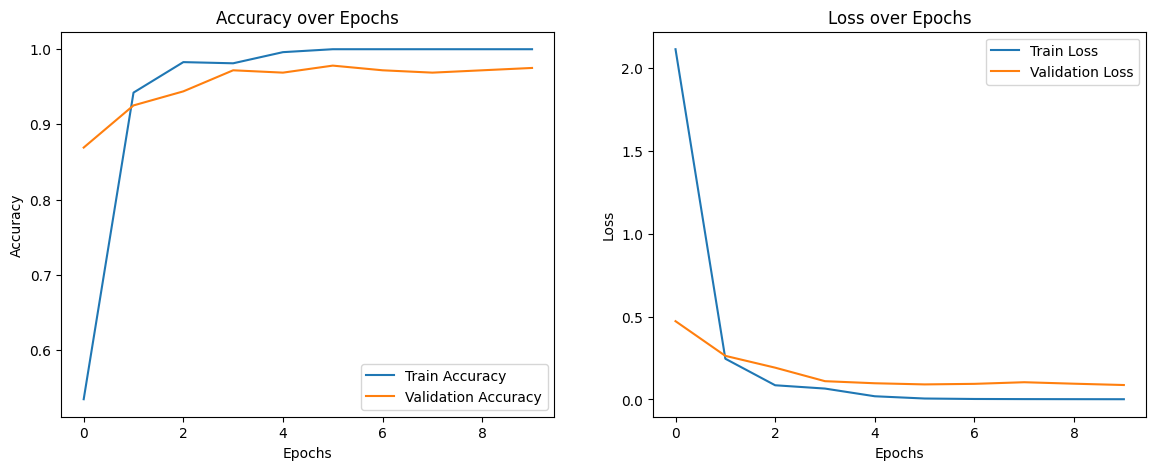

In [19]:
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


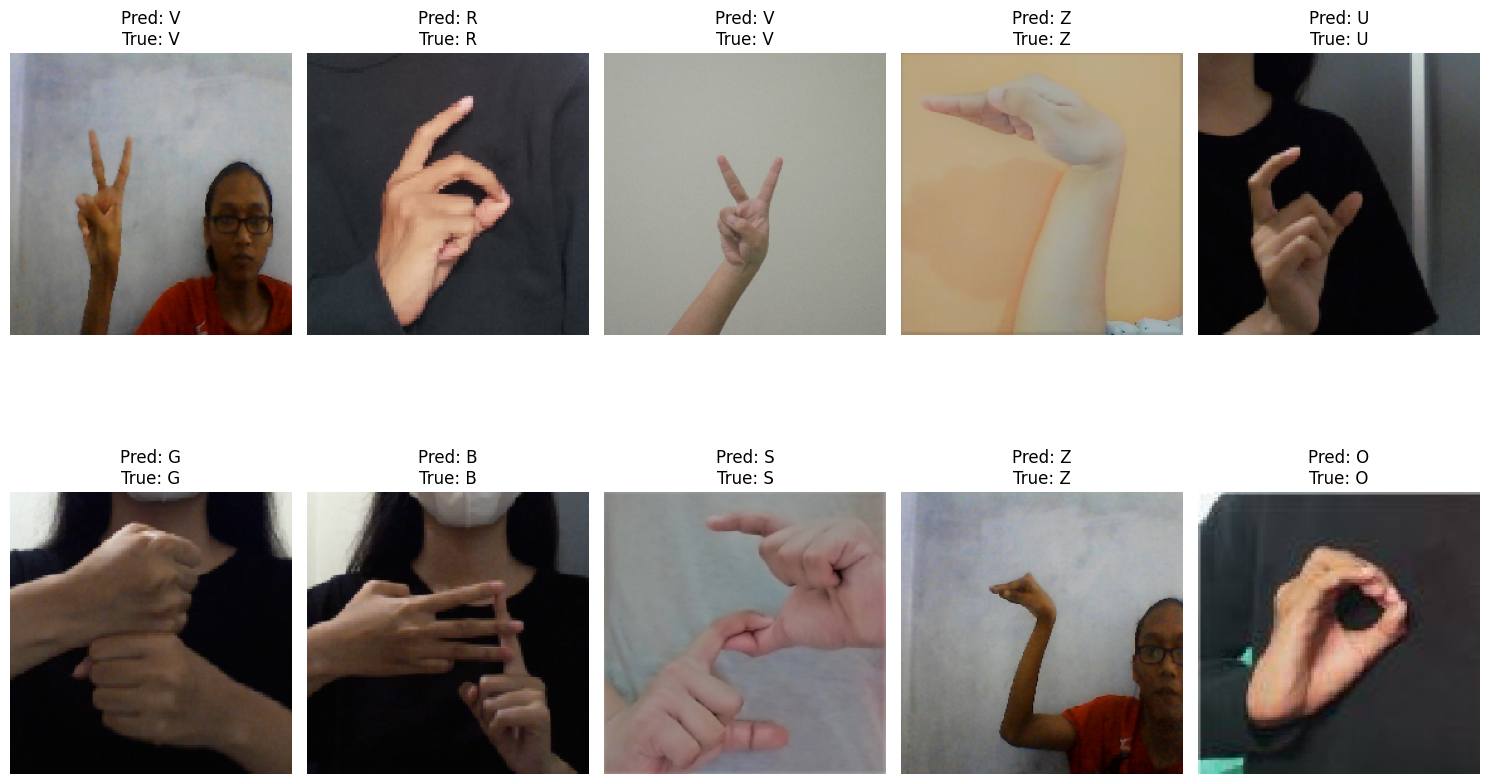

In [21]:
# Visualize a few sample predictions along with their true labels
num_samples = 10
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {predicted_class[i]}\nTrue: {true_class[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
directory = "tfjs_model1"
parent_dir = "/content"
path = os.path.join(parent_dir, directory)
os.makedirs(path, exist_ok=True)

In [8]:
import tensorflowjs as tfjs

!tensorflowjs_converter --input_format keras modelVGG.h5 /content/tfjs_model

2024-06-09 18:08:19.435670: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [9]:
!ls /content/tfjs_model

group1-shard10of27.bin	group1-shard17of27.bin	group1-shard23of27.bin	group1-shard4of27.bin
group1-shard11of27.bin	group1-shard18of27.bin	group1-shard24of27.bin	group1-shard5of27.bin
group1-shard12of27.bin	group1-shard19of27.bin	group1-shard25of27.bin	group1-shard6of27.bin
group1-shard13of27.bin	group1-shard1of27.bin	group1-shard26of27.bin	group1-shard7of27.bin
group1-shard14of27.bin	group1-shard20of27.bin	group1-shard27of27.bin	group1-shard8of27.bin
group1-shard15of27.bin	group1-shard21of27.bin	group1-shard2of27.bin	group1-shard9of27.bin
group1-shard16of27.bin	group1-shard22of27.bin	group1-shard3of27.bin	model.json


In [10]:
!zip -r tfjs_model.zip tfjs_model
from google.colab import files
files.download('tfjs_model.zip')


  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard5of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard11of27.bin (deflated 8%)
  adding: tfjs_model/group1-shard19of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard1of27.bin (deflated 8%)
  adding: tfjs_model/group1-shard23of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard10of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard14of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard8of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard25of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard16of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard22of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard4of27.bin (deflated 8%)
  adding: tfjs_model/group1-shard17of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard15of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard6of27.bin (deflated 8%)
  adding: tfjs_model/group1-shard20of27.bin (deflated 7%)
  adding: tfjs_model/group1-shard21of27.bin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import tensorflowjs as tfjs

!tensorflowjs_converter --input_format keras modelVGG.h5 /content/tfjs_model1

2024-06-09 18:18:42.662261: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [16]:
!zip -r tfjs_model1.zip tfjs_model1
from google.colab import files
files.download('tfjs_model1.zip')


  adding: tfjs_model1/ (stored 0%)
  adding: tfjs_model1/group1-shard5of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard11of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard19of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard1of27.bin (deflated 8%)
  adding: tfjs_model1/group1-shard23of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard10of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard14of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard8of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard25of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard16of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard22of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard4of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard17of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard15of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard6of27.bin (deflated 7%)
  adding: tfjs_model1/group1-shard20of27.bin (deflated 7%)
  adding: tfjs_model1/grou

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>